# Loan Approval Prediction Through Machine Learning

Dataset Link: [Kaggle Dataset](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data)


## Preprocessing the Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('loan_approval_dataset.csv')


# Step 1: Clean column names
data.columns = data.columns.str.strip()

# Step 2: Clean and standardize string values in categorical columns
data['education'] = data['education'].str.strip().str.title()
data['self_employed'] = data['self_employed'].str.strip().str.title()
data['loan_status'] = data['loan_status'].str.strip().str.title()

# Step 3: Map categorical features to numerical
data['education'] = data['education'].map({'Not Graduate': 0, 'Graduate': 1})
data['self_employed'] = data['self_employed'].map({'No': 0, 'Yes': 1})
data['loan_status'] = data['loan_status'].map({'Rejected': 0, 'Approved': 1})


# Step 4: Prepare continuous features (scale them for machine learning models)
# Identify continuous features
continuous_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
                       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Standardize continuous features
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Step 5: Verify preprocessing
print("\nAfter Preprocessing:")
print(data.head())

# Step 6: Split features and target for modeling
X = data.drop(['loan_id', 'loan_status'], axis=1)  # Drop ID and target
y = data['loan_status']  # Target variable



After Preprocessing:
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          1              0      1.617979   
1        2                 0          0              1     -0.341750   
2        3                 3          1              0      1.439822   
3        4                 3          1              0      1.119139   
4        5                 5          0              1      1.689242   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     1.633052   0.192617     1.032792                 -0.780058   
1    -0.324414  -0.508091    -1.061051                 -0.733924   
2     1.610933   1.594031    -0.544840                 -0.057300   
3     1.721525  -0.508091    -0.771045                  1.649637   
4     1.002681   1.594031    -1.264055                  0.757724   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 2.877289             0.832028        

## Training the Models

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Define X and y from the preprocessed data
X = data.drop(['loan_id', 'loan_status'], axis=1)  # Drop ID and target
y = data['loan_status']  # Target variable

# Proceed with the model code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes

In [ ]:
# Initialize the
gnb = GaussianNB()

# Train and predict with Gaussian Naive Bayes
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# Print classification reports for each model
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_predictions))

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       318
           1       0.96      0.94      0.95       536

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



### Logistic Regression

In [ ]:
# Initialize the models
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train and predict with Logistic Regression
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



### Support Vector Machine

In [ ]:
svm = SVC(kernel='linear', random_state=42)

# Train and predict with Support Vector Machine (SVM)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

print("\nSupport Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, svm_predictions))


Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       318
           1       0.94      0.92      0.93       536

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



## Model Performance

### Precision Recall Curve

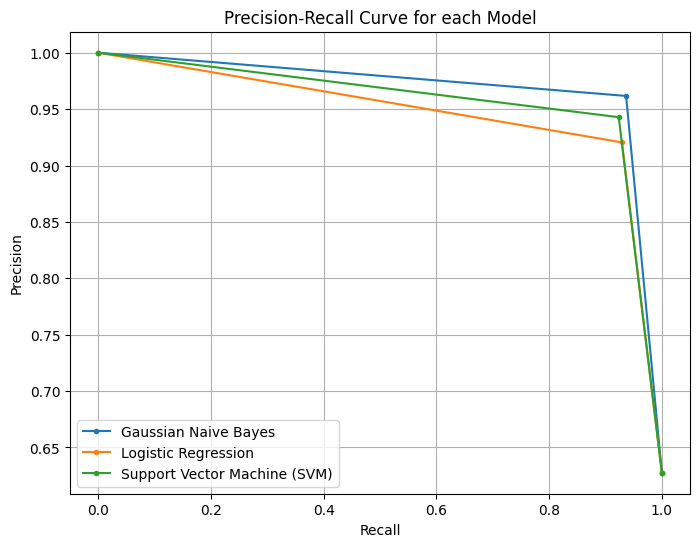

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

gnb_precision, gnb_recall, _ = precision_recall_curve(y_test, gnb_predictions)
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_predictions)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_predictions)

plt.figure(figsize=(8, 6))

plt.plot(gnb_recall, gnb_precision, marker='.', label='Gaussian Naive Bayes')
plt.plot(logreg_recall, logreg_precision, marker='.', label='Logistic Regression')
plt.plot(svm_recall, svm_precision, marker='.', label='Support Vector Machine (SVM)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Model')
plt.legend()
plt.grid()
plt.show()

### ROC Curve with AUC

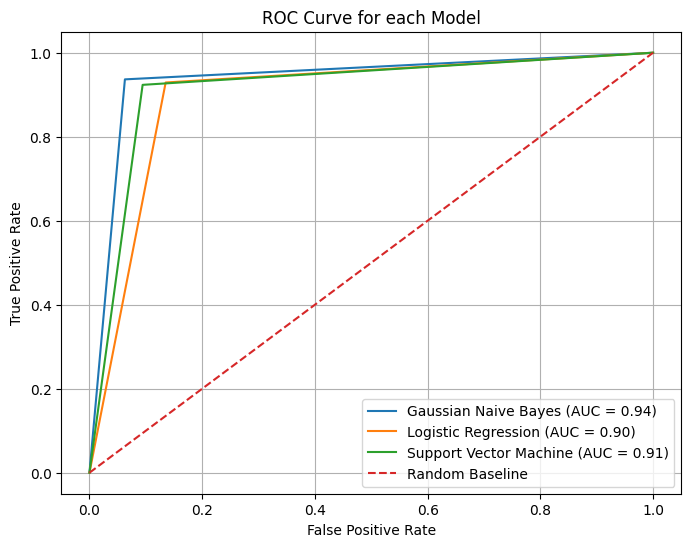

In [ ]:
gnb_fp, gnb_tp, _ = roc_curve(y_test, gnb_predictions)
logreg_fp, logreg_tp, _ = roc_curve(y_test, logreg_predictions)
svm_fp, svm_tp, _ = roc_curve(y_test, svm_predictions)

gnb_roc_auc = auc(gnb_fp, gnb_tp)
logreg_roc_auc = auc(logreg_fp, logreg_tp)
svm_roc_auc = auc(svm_fp, svm_tp)

plt.figure(figsize=(8, 6))
plt.plot(gnb_fp, gnb_tp, label=f'Gaussian Naive Bayes (AUC = {gnb_roc_auc:.2f})')
plt.plot(logreg_fp, logreg_tp, label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot(svm_fp, svm_tp, label=f'Support Vector Machine (AUC = {svm_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], label='Random Baseline', linestyle='dashed')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

1. UCI Machine Learning Repository, Loan Approval Dataset: [Link]
2. scikit-learn Documentation: https://scikit-learn.org/stable/
3. Brownlee, J., "A Gentle Introduction to ROC Curves," Machine Learning Mastery, 2021.
4. "Precision-Recall Curves for Imbalanced Datasets," Towards Data Science, 2020.


# References

Here are the sources formatted in IEEE citation style for your paper:

IBM, "What Is Support Vector Machine?" IBM Topics. [Online]. Available: https://www.ibm.com/topics/support-vector-machine. Accessed: Nov. 30, 2024.

GeeksforGeeks, "Support Vector Machine (SVM) Algorithm," GeeksforGeeks. [Online]. Available: https://www.geeksforgeeks.org/support-vector-machine-algorithm/. Accessed: Nov. 30, 2024.

Wikipedia contributors, "Support vector machine," Wikipedia, The Free Encyclopedia. [Online]. Available: https://en.wikipedia.org/wiki/Support_vector_machine. Accessed: Nov. 30, 2024.

Analytics Vidhya, "Guide on Support Vector Machine (SVM) Algorithm," Analytics Vidhya. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/. Accessed: Nov. 30, 2024.

Stanford University, "Support Vector Machines: Lecture Notes," Stanford Engineering Everywhere. [Online]. Available: https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf. Accessed: Nov. 30, 2024.